<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


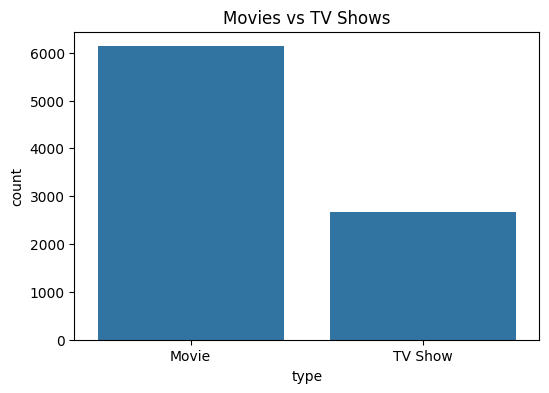

/tmp/ipython-input-4-2316340118.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


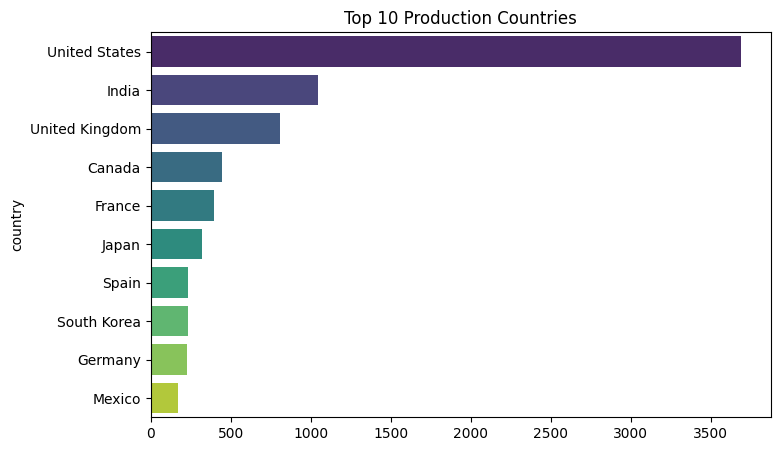

/tmp/ipython-input-4-2316340118.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


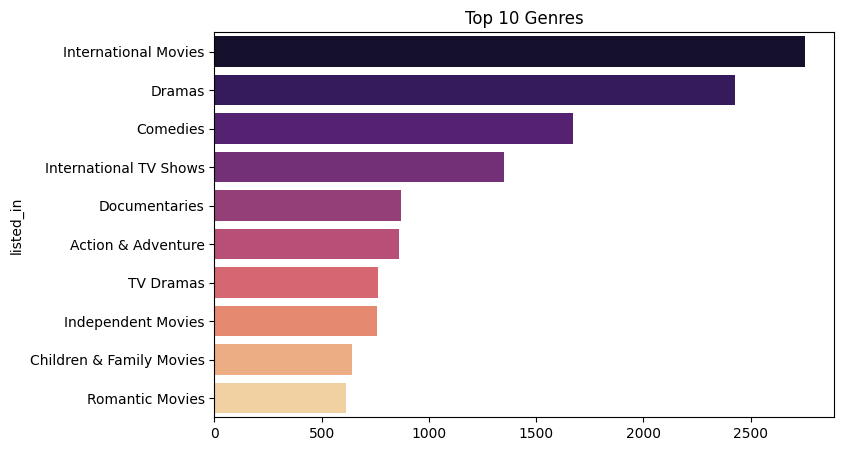

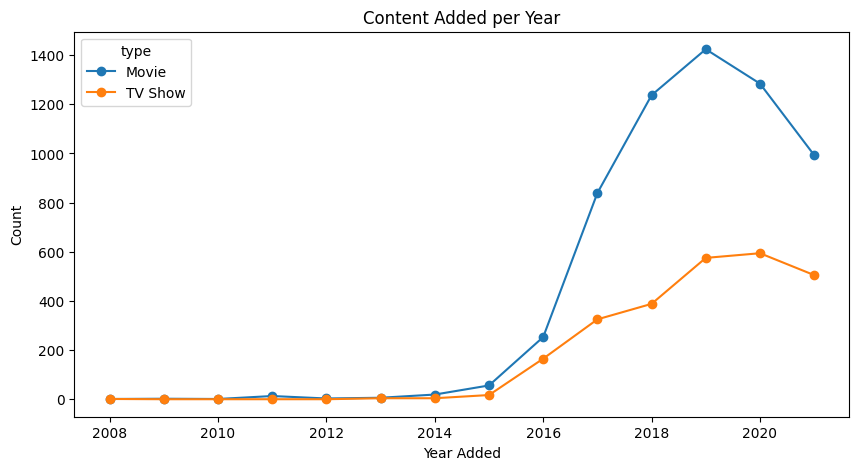

In [4]:
# Step 1: Libraries & Load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the 'plots' directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

df = pd.read_csv('/content/netflix_titles.csv')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 2: Basic Data Overview
df.info()
df[['type','release_year','duration']].describe(include='all')

# Step 3: Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows')
plt.savefig('plots/type_distribution.png')
plt.show()

# Step 4: Top Production Countries
# Clean multiple countries per title
countries = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Production Countries')
plt.savefig('plots/top_countries.png')
plt.show()

# Step 5: Genre Analysis
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres')
plt.savefig('plots/genre_count.png')
plt.show()

# Step 6: Content Timeline
df['year_added'] = df['date_added'].dt.year
yearly = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly.plot(figsize=(10,5), marker='o')
plt.title('Content Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.savefig('plots/yearly_timeline.png')
plt.show()